In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Function to read the dataset
def read_data(path):
    df = pd.read_csv(path, delimiter=' ', header=None)
    # Drop empty columns (the last two)
    df.drop([26, 27], axis=1, inplace=True)
    return df

# Column names based on the CMAPSS dataset
names = ['unit', 'time', 'altitude', 'mach', 'TRA', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30',
         'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
         'PCNfR_dmd', 'W31', 'W32']

# Load the dataset
df_train = read_data('train_FD001.txt')
df_train.columns = names

# Function to visualize data and save as PDF
def inspect_variables(df, unit=None, pdf=None):
    # Filter by unit (engine) for visualizations
    if unit is not None:
        df = df[df['unit'] == unit]

    # --- Time Series Plots ---
    fig, axes = plt.subplots(5, 5, figsize=(15, 12))
    for idx, ax in enumerate(axes.flatten()):
        if idx < len(names[5:]):
            ax.plot(df['time'], df[names[idx+5]], marker='o', markersize=1, linestyle='-')
            ax.set_title(names[idx+5], fontsize=10)
            ax.set_xlabel('Time', fontsize=8)
            ax.set_ylabel('Value', fontsize=8)
            ax.grid(True)
    fig.suptitle(f'Unit {unit}: Sensor Readings (Time Series)', fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
    pdf.savefig()
    plt.close()

    # --- Histograms ---
    fig, axes = plt.subplots(5, 5, figsize=(15, 12))
    for idx, ax in enumerate(axes.flatten()):
        if idx < len(names[5:]):
            ax.hist(df[names[idx+5]], bins=20, color='skyblue')
            ax.set_title(f'Histogram: {names[idx+5]}', fontsize=10)
            ax.set_xlabel('Value', fontsize=8)
            ax.set_ylabel('Frequency', fontsize=8)
            ax.grid(True)
    fig.suptitle('Sensor Readings Distribution (Histograms)', fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    pdf.savefig()
    plt.close()

    # --- Violin Plots ---
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df[names[5:]], inner='quartile')
    plt.title('Violin Plot of Sensor Readings', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # --- Correlation Heatmap ---
    corr = df[names[5:]].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Sensor Readings', fontsize=14)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

# Generate PDF report
with PdfPages('data_exploration_report.pdf') as pdf:
    inspect_variables(df_train, unit=1, pdf=pdf)

print("PDF report generated successfully!")
# Load the test dataset
df_test = read_data('test_FD001.txt')  # Replace with the actual test dataset path
df_test.columns = names

# Generate a PDF report for the test data
with PdfPages('test_data_exploration_report.pdf') as pdf:
    inspect_variables(df_test, unit=1, pdf=pdf)

print("Test data PDF report generated successfully!")


PDF report generated successfully!
Test data PDF report generated successfully!


In [5]:
# generated cleaned test data csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Function to read the dataset
def read_data(path):
    df = pd.read_csv(path, delimiter=' ', header=None)
    # Drop empty columns (the last two)
    df.drop([26, 27], axis=1, inplace=True)
    return df

# Column names based on the CMAPSS dataset
names = ['unit', 'time', 'altitude', 'mach', 'TRA', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30',
         'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
         'PCNfR_dmd', 'W31', 'W32']

# Load the dataset
df_train = read_data('test_FD001.txt')
df_train.columns = names

# Save the cleaned dataset to a new CSV file
df_train.to_csv('cleaned_test_FD001.csv', index=False)

In [6]:
print("Training Data Columns:", df_train.columns)
print("Test Data Columns:", df_test.columns)

Training Data Columns: Index(['unit', 'time', 'altitude', 'mach', 'TRA', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')
Test Data Columns: Index(['unit', 'time', 'altitude', 'mach', 'TRA', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')


Missing Values:
 Series([], dtype: int64)
Missing Values in Test Data:
 Series([], dtype: int64)


<ipython-input-7-e31859d6ab87>:50: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_train[sensor_columns], scale='width', inner='quartile')


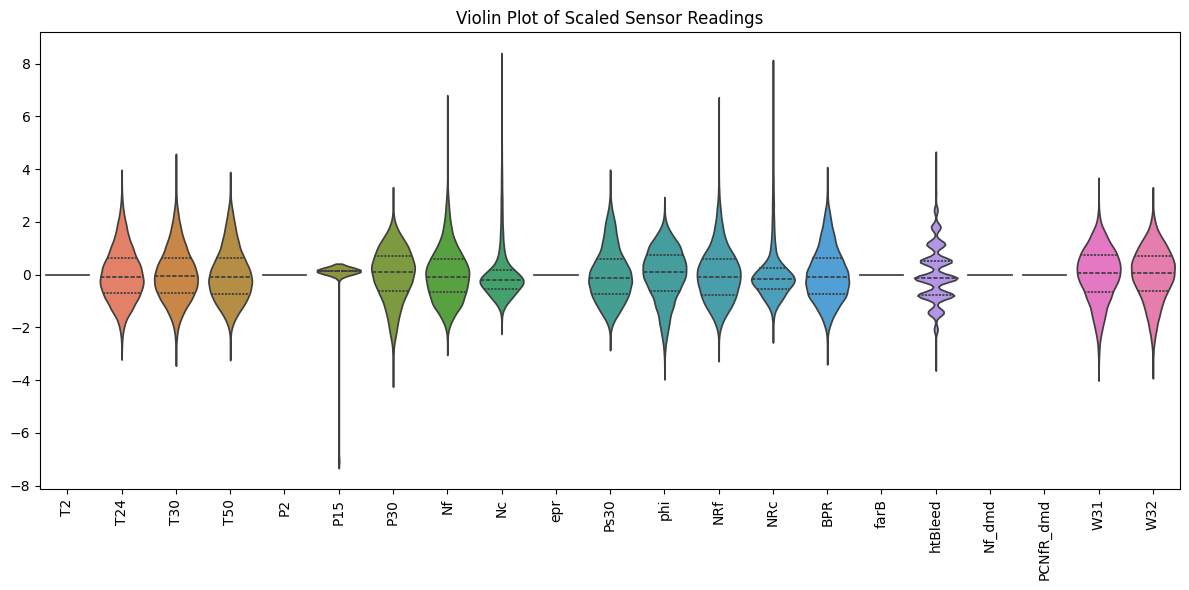

In [7]:
# data preprocessing on training data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def read_data(path):
    # Adjust delimiter for space-separated values or tab-separated depending on your file
    df = pd.read_csv(path, delimiter=' ', header=None)
    df.drop([26, 27], axis=1, inplace=True)  # Remove extra columns if necessary
    names = ['unit', 'time', 'altitude', 'mach', 'TRA', 'T2', 'T24', 'T30',
             'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi',
             'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
             'PCNfR_dmd', 'W31', 'W32']
    df.columns = names
    return df

# Replace the file path with your actual file path
df_train = read_data('train_FD001.txt')

# Check for missing values
missing_values = df_train.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# In this dataset, there are generally no missing values, but if found:
df_train.fillna(df_train.median(), inplace=True)

# Scaling the data
scaler = StandardScaler()
sensor_columns = df_train.columns[5:]  # Select only sensor columns for scaling
df_train[sensor_columns] = scaler.fit_transform(df_train[sensor_columns])

# Data processing on test data
# Load test data
df_test = read_data('test_FD001.txt')

# Check for missing values in test data
missing_values_test = df_test.isnull().sum()
print("Missing Values in Test Data:\n", missing_values_test[missing_values_test > 0])

# Fill missing values in test data (same as for training)
df_test.fillna(df_test.median(), inplace=True)

# Scaling the test data using the same scaler from training data
df_test[sensor_columns] = scaler.transform(df_test[sensor_columns])

# Violin Plot for Scaled Sensor Data
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train[sensor_columns], scale='width', inner='quartile')
plt.title('Violin Plot of Scaled Sensor Readings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


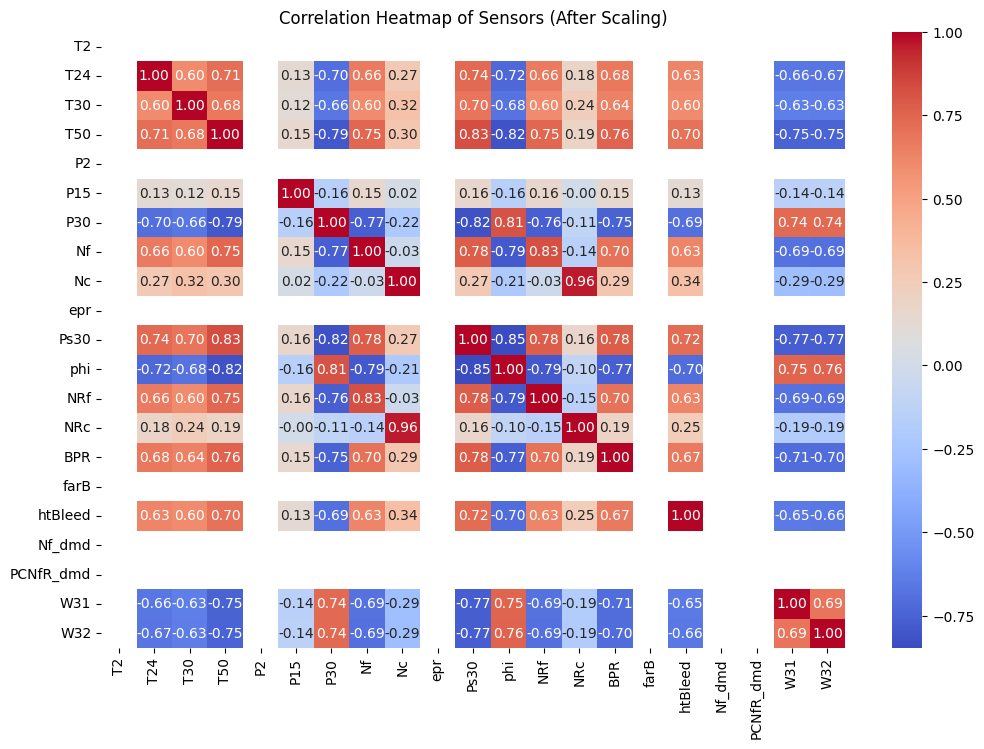

In [8]:

#Correlation Heatmap (After Scaling)
plt.figure(figsize=(12, 8))
corr = df_train[sensor_columns].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Sensors (After Scaling)')
plt.show()

# Saving Preprocessed Data
df_train.to_csv('preprocessed_train_data.csv', index=False)
df_test.to_csv('preprocessed_test_data.csv', index= False)


rul          1.000000
phi          0.671983
P30          0.657223
W32          0.635662
W31          0.629428
unit         0.078753
mach        -0.001948
altitude    -0.003198
P15         -0.128348
NRc         -0.306769
Nc          -0.390102
NRf         -0.562569
Nf          -0.563968
T30         -0.584520
htBleed     -0.606154
T24         -0.606484
BPR         -0.642667
T50         -0.678948
Ps30        -0.696228
time        -0.736241
TRA               NaN
T2                NaN
P2                NaN
epr               NaN
farB              NaN
Nf_dmd            NaN
PCNfR_dmd         NaN
Name: rul, dtype: float64


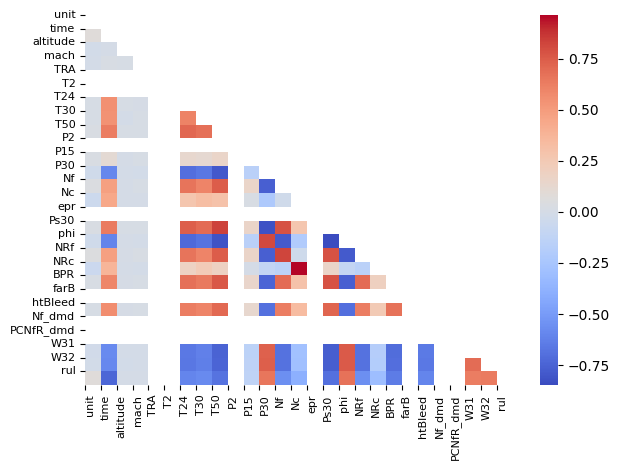

In [9]:
# Set RUL for training set.
rul = pd.DataFrame(df_train.groupby('unit')['time'].max())
rul.reset_index(inplace=True)
rul.columns = ['unit', 'time_last']

train = pd.merge(df_train, rul, on='unit')
train['rul'] = train['time_last'] - train['time']
train[train.unit==1][['rul', 'time_last', 'time']]
train.drop(['time_last'], axis=1, inplace=True)

# Check correlations of variables.

corr = train.corr()
print(corr['rul'].sort_values(ascending=False))

plt.figure()
mask = np.zeros_like(corr, dtype=bool)  # Use bool instead of np.bool
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, fontsize=8, ha='left')
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, fontsize=8, ha='right')
plt.tight_layout()


<ipython-input-10-228c48b64e8f>:29: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, unit_data['rul']], ignore_index=True)
<ipython-input-10-228c48b64e8f>:35: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_val = pd.concat([y_val, unit_data['rul']], ignore_index=True)


Mean Squared Error: 1669.387647791271
R-squared: 0.556551441959622
Explained Variance Score: 0.5596903992649751


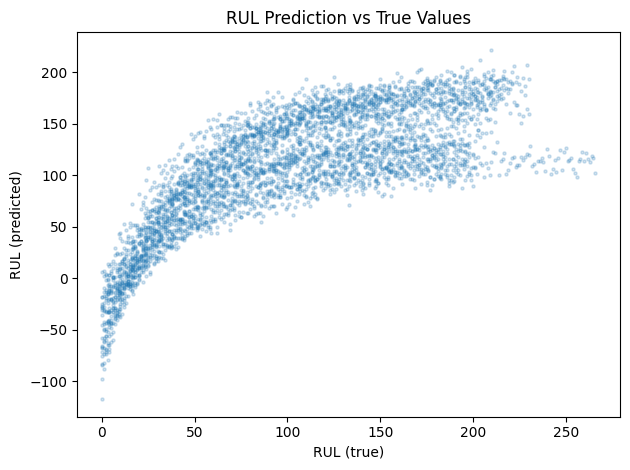

Files saved successfully!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def get_train_val(df):
    # Ensure that we have enough units for splitting
    units = df['unit'].unique()

    # Set the random seed for reproducibility
    np.random.seed(0)

    # Split units into 80% for training and 20% for validation
    unit_train = np.random.choice(units, int(len(units)*0.8), replace=False)
    unit_val = np.array(list(set(units) - set(unit_train)))

    # Initialize training and validation sets
    x_train = pd.DataFrame()
    y_train = pd.Series(dtype=np.float64)  # Ensure it's the correct data type
    x_val = pd.DataFrame()
    y_val = pd.Series(dtype=np.float64)

    # Collect data for training
    for unit in unit_train:
        unit_data = df[df['unit'] == unit]
        x_train = pd.concat([x_train, unit_data.drop(['unit', 'time', 'rul'], axis=1)], ignore_index=True)
        y_train = pd.concat([y_train, unit_data['rul']], ignore_index=True)

    # Collect data for validation
    for unit in unit_val:
        unit_data = df[df['unit'] == unit]
        x_val = pd.concat([x_val, unit_data.drop(['unit', 'time', 'rul'], axis=1)], ignore_index=True)
        y_val = pd.concat([y_val, unit_data['rul']], ignore_index=True)

    # Return the features and labels for training and validation sets
    return x_train, x_val, y_train, y_val

# Example usage
x_train, x_val, y_train, y_val = get_train_val(train)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Saving the split and scaled data to CSV files
pd.DataFrame(x_train_scaled).to_csv('x_train_scaled.csv', index=False)
pd.Series(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(x_val_scaled).to_csv('x_val_scaled.csv', index=False)
pd.Series(y_val).to_csv('y_val.csv', index=False)

# Linear Regression Model
reg_lin = LinearRegression()
reg_lin.fit(x_train_scaled, y_train)
predictions = reg_lin.predict(x_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)
evs = explained_variance_score(y_val, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {evs}')

# Plotting the predictions vs actual values
plt.figure()
plt.scatter(y_val, predictions, s=5, alpha=0.2)
plt.xlabel('RUL (true)')
plt.ylabel('RUL (predicted)')
plt.title('RUL Prediction vs True Values')
plt.tight_layout()
plt.show()

print("Files saved successfully!")


<ipython-input-11-6e3ceeb998a7>:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, unit_data['rul']], ignore_index=True)
<ipython-input-11-6e3ceeb998a7>:32: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_val = pd.concat([y_val, unit_data['rul']], ignore_index=True)


Files saved successfully!


Text(0, 0.5, 'RUL')

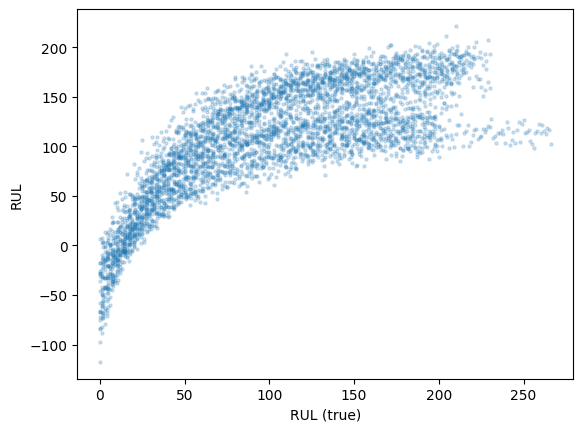

In [11]:
#splitting dataset and applying on the linear regressor model
import pandas as pd
import numpy as np

def get_train_val(df):
    # Ensure that we have enough units for splitting
    units = df['unit'].unique()

    # Set the random seed for reproducibility
    np.random.seed(0)

    # Split units into 80% for training and 20% for validation
    unit_train = np.random.choice(units, int(len(units)*0.8), replace=False)
    unit_val = np.array(list(set(units) - set(unit_train)))

    # Initialize training and validation sets
    x_train = pd.DataFrame()
    y_train = pd.Series()
    x_val = pd.DataFrame()
    y_val = pd.Series()

    # Collect data for training
    for unit in unit_train:
        unit_data = df[df['unit'] == unit]
        x_train = pd.concat([x_train, unit_data.drop(['unit', 'time', 'rul'], axis=1)], ignore_index=True)
        y_train = pd.concat([y_train, unit_data['rul']], ignore_index=True)

    # Collect data for validation
    for unit in unit_val:
        unit_data = df[df['unit'] == unit]
        x_val = pd.concat([x_val, unit_data.drop(['unit', 'time', 'rul'], axis=1)], ignore_index=True)
        y_val = pd.concat([y_val, unit_data['rul']], ignore_index=True)

    # Return the features and labels for training and validation sets
    return x_train, x_val, y_train, y_val


# Example usage
x_train, x_val, y_train, y_val = get_train_val(train)

# Saving the split data to CSV files
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_val.to_csv('x_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

print("Files saved successfully!")


# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

reg_lin = LinearRegression()
reg_lin.fit(x_train, y_train)
predictions = reg_lin.predict(x_val)
plt.figure()
plt.scatter(y_val, predictions, s=5, alpha=0.2)
plt.xlabel('RUL (true)')
plt.ylabel('RUL')


In [12]:
# Evaluate the model with some metrics.

def custom_loss(y_true, y_pred, weights=None):
  diff = np.array(y_pred, dtype=float) - np.array(y_true, dtype=float)
  mask = diff < 0.
  diff[mask] = np.exp(-diff[mask]*0.077) - 1.
  mask = diff >= 0.
  diff[mask] = np.exp(diff[mask]*0.1) - 1.
  return diff.sum()

predictions[predictions < 1] = 1
print('MSE', mean_squared_error(y_val, predictions))
print('R2', r2_score(y_val, predictions))
print('score', custom_loss(y_val, predictions))

MSE 1581.595298881768
R2 0.5798722030676883
score inf


<ipython-input-12-b85d56c779c8>:8: RuntimeWarning: overflow encountered in exp
  diff[mask] = np.exp(diff[mask]*0.1) - 1.


<ipython-input-11-6e3ceeb998a7>:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, unit_data['rul']], ignore_index=True)
<ipython-input-11-6e3ceeb998a7>:32: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_val = pd.concat([y_val, unit_data['rul']], ignore_index=True)


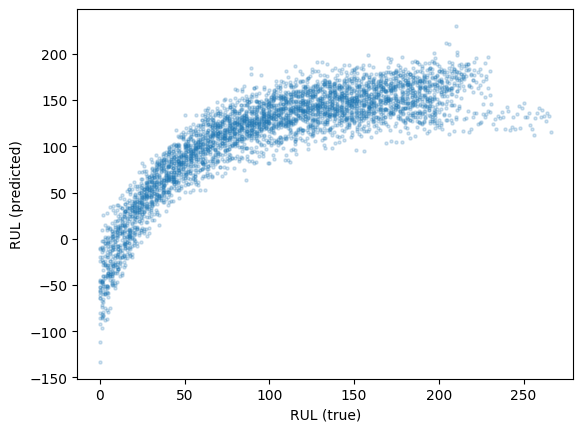

MSE: 1190.7795347344522
R2: 0.6836867288908988
Score: 1.290298187201829e+45


In [13]:
# Feature Engineering Function
def feature_engineering(frame):
    window = 20

    # Initialize features with unit 1 data
    df = frame[frame.unit == 1].copy()
    stable = df[:window].rolling(window).mean()[-1:]
    features = df - stable.to_numpy()

    # Loop over the rest of the units
    for unit in np.arange(2, 101):
        df = frame[frame.unit == unit].copy()
        stable = df[:window].rolling(window).mean()[-1:]
        df = df - stable.to_numpy()
        features = pd.concat([features, df])

    # Define columns for the difference features
    diffs = ['unit', 'time', 'altitude', 'mach', 'TRA', 'T2_diff', 'T24_diff', 'T30_diff', 'T50_diff', 'P2_diff',
             'P15_diff', 'P30_diff', 'Nf_diff', 'Nc_diff', 'epr_diff', 'Ps30_diff', 'phi_diff', 'NRf_diff', 'NRc_diff',
             'BPR_diff', 'farB_diff', 'htBleed_diff', 'Nf_dmd_diff', 'PCNfR_dmd_diff', 'W31_diff', 'W32_diff', 'rul']
    features.columns = diffs

    # Restore original values for some columns
    restore = ['unit', 'time', 'rul', 'altitude', 'mach', 'TRA']
    features[restore] = frame[restore]

    return features

# Apply Feature Engineering
features = feature_engineering(train)
df_train = pd.merge(train, features, on=['unit', 'time', 'rul', 'altitude', 'mach', 'TRA'])

# Prepare Training and Validation Data
x_train, x_val, y_train, y_val = get_train_val(df_train)

# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_lin = LinearRegression()
reg_lin.fit(x_train, y_train)
predictions = reg_lin.predict(x_val)

# Plot RUL(True) vs RUL(Predicted)
plt.figure()
plt.scatter(y_val, predictions, s=5, alpha=0.2)
plt.xlabel('RUL (true)')
plt.ylabel('RUL (predicted)')
plt.show()

# Adjust predictions if they are less than 1
predictions[predictions < 1] = 1

# Custom Loss Function with Clipping to Prevent Overflow
def custom_loss(y_true, y_pred, weights=None):
    diff = np.array(y_pred, dtype=float) - np.array(y_true, dtype=float)

    # Handle underestimation (d < 0)
    mask = diff < 0
    diff[mask] = np.exp(-diff[mask] * 0.077) - 1

    # Handle overestimation (d >= 0) with clipping to prevent overflow
    mask = diff >= 0
    diff[mask] = np.exp(np.clip(diff[mask] * 0.1, -100, 100)) - 1  # Clipping to avoid overflow

    return diff.sum()

# Evaluate the model
print('MSE:', mean_squared_error(y_val, predictions))
print('R2:', r2_score(y_val, predictions))
print('Score:', custom_loss(y_val, predictions))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'enet__max_iter': 10000, 'enet__l1_ratio': 1.0, 'enet__alpha': 0.1}

Evaluation Metrics:
MSE: 1140.5244
R2 Score: 0.6970
Custom Loss Score: 1007788.3570


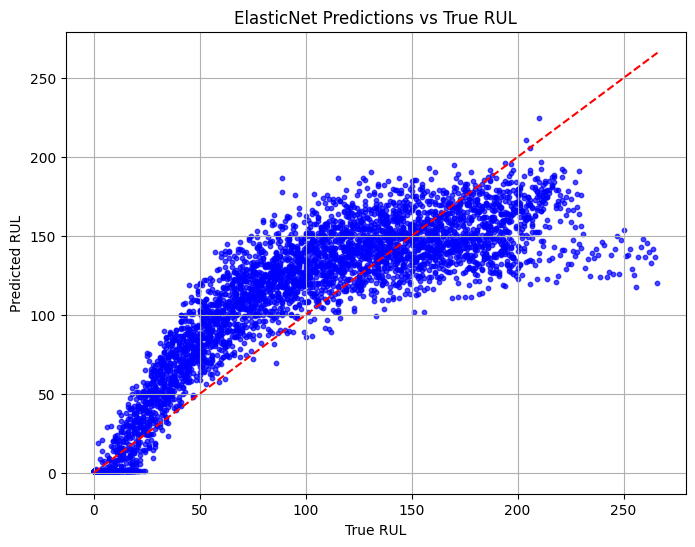


Feature Importance:
NRf            : 38.8658
NRf_diff       : -33.0321
T30            : -26.8070
T30_diff       : 21.8882
W32            : 19.3125
W31_diff       : 14.4459
Ps30_diff      : -12.6986
T24            : -12.3113
W32_diff       : -11.7758
phi            : 11.2516
htBleed        : -10.1888
W31            : -10.0981
P15            : -9.5099
T50_diff       : -9.2070
NRc            : 8.3737
P30_diff       : 7.2433
T24_diff       : 6.6452
BPR_diff       : -6.4444
NRc_diff       : -6.1983
htBleed_diff   : 5.8198
Nf             : -3.5145
P15_diff       : 2.8301
Nc_diff        : -2.1899
Nf_diff        : -0.7125
mach           : 0.2213


In [14]:
# Optimizing Code with RandomizedSearchCV and Reduced Cross-Validation

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Define your custom loss function
def custom_loss(y_true, y_pred):
    """
    Custom loss function based on the asymmetric scoring formula provided.
    """
    diff = y_pred - y_true
    # Clipping to prevent overflow
    diff = np.clip(diff, -100, 100)
    loss = np.where(diff < 0, np.exp(-diff / 10) - 1, np.exp(diff / 13) - 1)
    return np.sum(loss)

# Create the custom scorer for RandomizedSearchCV
metric = make_scorer(custom_loss, greater_is_better=False)

# Define the pipeline
steps = [
    ('scaler', RobustScaler()),
    ('enet', ElasticNet())
]
reg_enet = Pipeline(steps=steps)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'enet__alpha': np.linspace(0.1, 1.0, 10),  # Reduce the range of alpha
    'enet__l1_ratio': np.linspace(0.1, 1.0, 5),  # Reduce the values of l1_ratio
    'enet__max_iter': [10000]  # Decrease max_iter for faster convergence
}

# Define cross-validation strategy with fewer splits
cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Set up RandomizedSearchCV with fewer iterations
rs_enet = RandomizedSearchCV(
    estimator=reg_enet,
    param_distributions=param_dist,
    scoring=metric,
    n_iter=10,  # Reduce the number of iterations (10 instead of a large number)
    cv=cv,
    n_jobs=-1,  # Parallelize across multiple cores
    verbose=2,
    random_state=0
)

# Fit the model on the training data
rs_enet.fit(x_train, y_train)

# Output the best hyperparameters
print("Best Parameters:", rs_enet.best_params_)

# Make predictions on the validation set
y_pred = rs_enet.predict(x_val)

# Clip predictions to avoid negative RUL
y_pred = np.clip(y_pred, 1, None)

# Evaluation Metrics
print("\nEvaluation Metrics:")
print(f"MSE: {mean_squared_error(y_val, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_val, y_pred):.4f}")
print(f"Custom Loss Score: {custom_loss(y_val, y_pred):.4f}")

# Scatter plot of predictions vs true RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, s=10, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('ElasticNet Predictions vs True RUL')
plt.grid(True)
plt.show()

# Extract and display feature importance
best_model = rs_enet.best_estimator_.named_steps['enet']
coef = best_model.coef_

importance = {name: coef[i] for i, name in enumerate(x_train.columns) if coef[i] != 0}
print("\nFeature Importance:")
for feature, coeff in sorted(importance.items(), key=lambda x: -abs(x[1])):
    print(f"{feature:15s}: {coeff:.4f}")


In [18]:
# Load the actual RUL values from rul_FD001.txt
rul_actual = pd.read_csv('RUL_FD001.txt', header=None).values.flatten()

# Check the first few RUL values to ensure they loaded correctly
print(rul_actual[:10])


[112  98  69  82  91  93  91  95 111  96]


In [19]:
# Check the range and distribution of the features
print(x_train.describe())


           altitude          mach      TRA       T2           T24  \
count  16584.000000  16584.000000  16584.0  16584.0  16584.000000   
mean      -0.000007      0.000003    100.0      0.0     -0.004706   
std        0.002188      0.000294      0.0      0.0      1.001357   
min       -0.008700     -0.000600    100.0      0.0     -2.941625   
25%       -0.001500     -0.000200    100.0      0.0     -0.721808   
50%        0.000000      0.000000    100.0      0.0     -0.081860   
75%        0.001500      0.000300    100.0      0.0      0.638080   
max        0.008700      0.000600    100.0      0.0      3.697829   

                T30           T50            P2           P15           P30  \
count  16584.000000  16584.000000  1.658400e+04  16584.000000  16584.000000   
mean      -0.005845     -0.007357 -1.776357e-15     -0.000278      0.000687   
std        0.997189      0.999010  0.000000e+00      1.000993      1.001999   
min       -3.047319     -2.964737 -1.776357e-15     -7.057993 

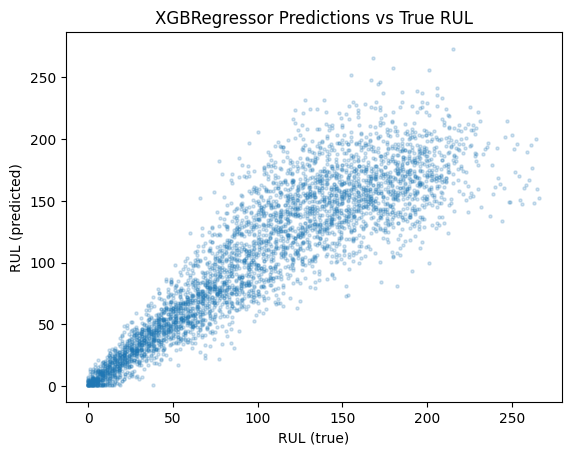

MSE: 789.3905680790654
R2: 0.7903098464012146
Custom Loss Score: 518228.93353655015


In [20]:
# Optimizing Gradient Boosted Regression with XGBoost for Faster Model Training and Prediction
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

steps = [
    ("scaler", RobustScaler()),
    ("xgb", XGBRegressor()),
]

# Create and fit the model
reg_xgb = Pipeline(steps=steps)
reg_xgb.fit(x_train, y_train)

# Make predictions
predictions = reg_xgb.predict(x_val)

# Clip predictions to avoid negative RUL values
predictions = np.clip(predictions, 1, None)

# Plot the predictions vs true RUL
plt.figure()
plt.scatter(y_val, predictions, s=5, alpha=0.2)
plt.xlabel('RUL (true)')
plt.ylabel('RUL (predicted)')
plt.title('XGBRegressor Predictions vs True RUL')
plt.show()

# Evaluation metrics
print('MSE:', mean_squared_error(y_val, predictions))
print('R2:', r2_score(y_val, predictions))
print('Custom Loss Score:', custom_loss(y_val, predictions))


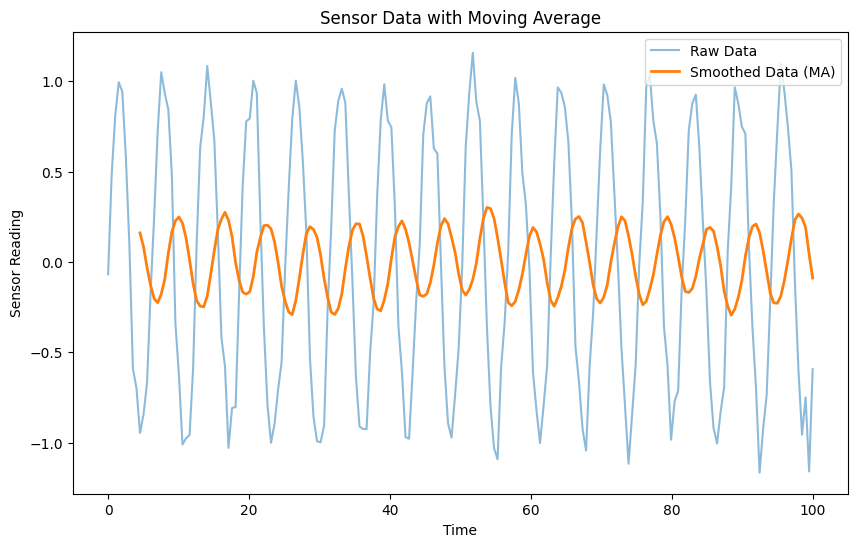

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Example raw sensor data (replace with your actual data)
time = np.linspace(0, 100, 200)
sensor_data = np.sin(time) + np.random.normal(0, 0.1, size=time.shape)

# Apply moving average (window size 10)
window_size = 10
smoothed_data = np.convolve(sensor_data, np.ones(window_size)/window_size, mode='valid')

# Plot raw vs smoothed sensor data
plt.figure(figsize=(10, 6))
plt.plot(time, sensor_data, label='Raw Data', alpha=0.5)
plt.plot(time[window_size-1:], smoothed_data, label='Smoothed Data (MA)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend()
plt.title('Sensor Data with Moving Average')
plt.show()
